# Computer Vision with Deep Learning: Classification, Detection, and Segmentation

# 🧭 Course Plan – Computer Vision with Deep Learning and OpenCV

## 1. Introduction to Computer Vision
- What is computer vision?
- Human vs machine vision
- Real-world applications
- Key tasks: classification, detection, segmentation

## 2. CNN Architecture
- Convolution, ReLU, Pooling, Flatten, Fully Connected layers
- Visual schematic of a CNN pipeline

## 3. Vision Tasks Illustrated
- Diagram contrasting classification, detection, and segmentation

## 4. Getting Started with OpenCV
- Loading and displaying an image
- Resizing, cropping, rotating
- Drawing (rectangles, text, etc.)
- Accessing the webcam

## 5. Advanced OpenCV Operations
- Edge detection (Canny)
- Binary thresholding and masking
- Color space transformations (HSV)
- Morphological operations (dilation)
- Contour detection
- Face detection with Haar cascades

## 6. Interactive Widgets
- Dynamic threshold control with sliders
- Adjustable kernel size for morphological operations

## 7. Image Classification with PyTorch
- Using CIFAR-10 dataset
- Data visualization
- Defining a simple CNN
- Model training

## 8. Data Augmentation
- Common augmentation methods (flip, rotation, jitter…)
- Training with and without augmentation
- Comparing performance

## 9. Final Project: Smart Sorting Assistant
- Classify waste types (plastic, paper, etc.)
- Fine-tuning ResNet18
- Interface for webcam or file upload
- Live prediction and visualization



## What is Computer Vision?

**Computer Vision** is a field of Artificial Intelligence that enables computers to interpret and make decisions based on visual data—such as images or videos—much like a human would. It's widely used in many industries: from self-driving cars to medical imaging, surveillance, augmented reality, and more.

### 🧠 Human Vision vs. Computer Vision
- **Human Vision**: Instinctively uFigure - available from: International Journal of Machine Learning and Cyberneticsmathematical models, and algorithms to interpret pixel information.


## 📸 Common Tasks in Computer Vision

| Task | Description | Output |
|------|-------------|--------|
| **Image Classification** | Assign a label to an entire image | e.g. "cat", "car" |
| **Object Detection** | Identify and locate objects in an image | Bounding boxes + labels |
| **Semantic Segmentation** | Assign a label to each pixel | Pixel-wise mask |
| **Instance Segmentation** | Segment different instances of the same class | Pixel-wise + individual mask |
| **Pose Estimation** | Detect body joints and keypoints | Coordinates over human shapes |
| **Face Recognition** | Identify or verify a person by facial features | ID or match score |


## 🔧 How It Works

Computer vision models are typically powered by **Convolutional Neural Networks (CNNs)**, a class of deep neural networks that are particularly effective at learning from image data.

### 🧱 Convolutional Neural Network (CNN) Basics
- **Convolution layers** extract patterns like edges and textures
- **Pooling layers** downsample features to reduce computation
- **Fully connected layers** interpret features for classification or regression

Here's a simplified pipeline:
```
Input Image → Convolution → ReLU → Pooling → … → Flatten → Fully Connected → Output
```


## 🧰 Applications in Real Life
- **Healthcare**: Tumor detection, MRI segmentation
- **Autonomous Driving**: Lane detection, obstacle avoidance
- **Retail**: Checkout-free stores, customer behavior analysis
- **Security**: Surveillance, facial recognition
- **Social Media**: Tag suggestions, content moderation


## 🧪 In This Notebook
You will explore three key tasks:
- 🏷️ **Classification** with CIFAR-10 dataset
- 🔍 **Detection** using Faster R-CNN
- 🎨 **Segmentation** using DeepLabV3

And complete a 🎯 **Final Project**: Real-time webcam classification using a pretrained MobileNet.



# Computer Vision with Deep Learning: Classification, Detection, and Segmentation

## Load and display a visual summary of vision tasks

This image illustrates the difference between common computer vision tasks such as classification, detection, and segmentation.

pip install pillow matplotlib torch torchvision ultralytics opencv-python

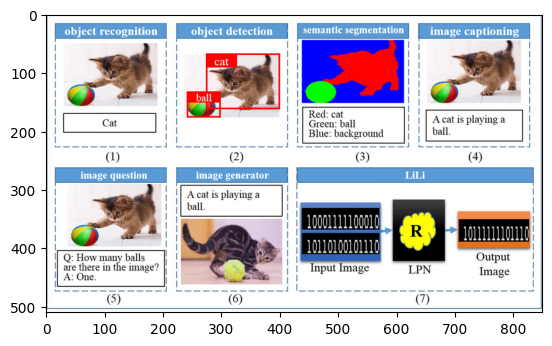

In [2]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open("The-differences-among-these-popular-computer-vision-tasks-1-Object-recognition.png")
plt.imshow(img)



## Quick Tutorial: OpenCV Basics

OpenCV (`cv2`) is a powerful library for computer vision. Here's a quick guide to essential operations:

### 📷 1. Load and Display an Image

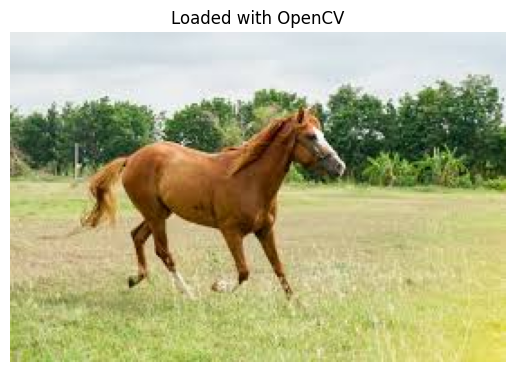

In [3]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('data/horse2.jpeg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.title("Loaded with OpenCV")
plt.axis("off")
plt.show()

### ✂️ 2. Resize, Crop, and Rotate

In [4]:
resized = cv2.resize(img, (100, 100))
cropped = img[50:150, 50:150]
(h, w) = img.shape[:2]
center = (w // 2, h // 2)
M = cv2.getRotationMatrix2D(center, 45, 1.0)
rotated = cv2.warpAffine(img, M, (w, h))

### 🎨 3. Draw on Image

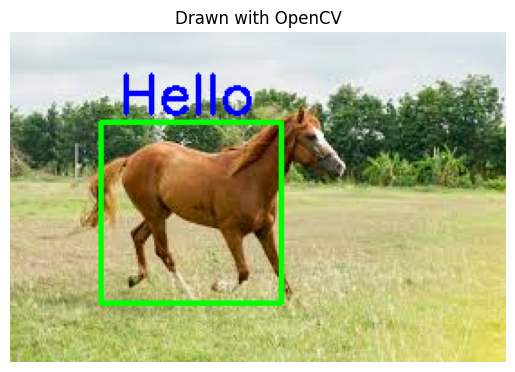

In [5]:
img_copy = img.copy()
cv2.rectangle(img_copy, (50, 50), (150, 150), (0, 255, 0), 2)
cv2.putText(img_copy, "Hello", (60, 45), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
plt.imshow(cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB))
plt.title("Drawn with OpenCV")
plt.axis("off")
plt.show()

### 🎥 4. Access Webcam

In [6]:
for i in range(3):
    cap = cv2.VideoCapture(i)
    if cap.isOpened():
        print(f"✅ Camera found at index {i}")
        cap.release()
        break
    else:
        print(f"❌ No camera at index {i}")
        

✅ Camera found at index 0


In [ ]:
cap = cv2.VideoCapture(0)  # WARNING ... ✅ Camera found at index 0 in the previous cell
while True:
    ret, frame = cap.read()
    if not ret:
        break
    cv2.imshow('Webcam Preview', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

KeyboardInterrupt: 

## OpenCV simple operations

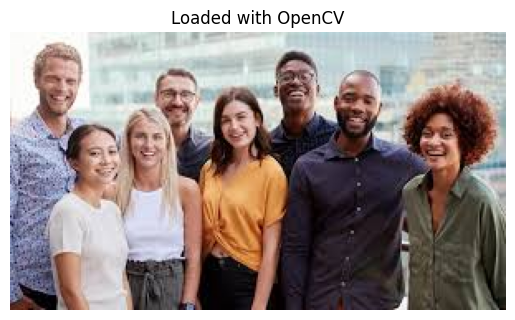

In [7]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('data/groupe.jpeg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.title("Loaded with OpenCV")
plt.axis("off")
plt.show()

### Exercice : try to apply some operations on this picture

1. Image Filtering & Edge Detection

Great for introducing low-level vision concepts.

Explanation (Markdown):

    Filtering lets us detect edges, blur images, or emphasize features using convolutional kernels.

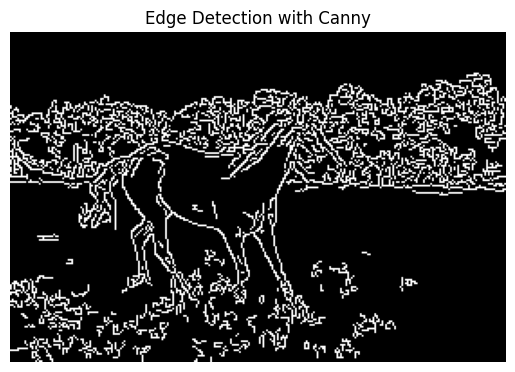

In [ ]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('data/horse2.jpeg', cv2.IMREAD_GRAYSCALE)
edges = cv2.Canny(img, 100, 200)

plt.imshow(edges, cmap='gray')
plt.title("Edge Detection with Canny")
plt.axis("off")
plt.show()


2. Color Spaces

Useful for segmentation, detection, filtering based on color.

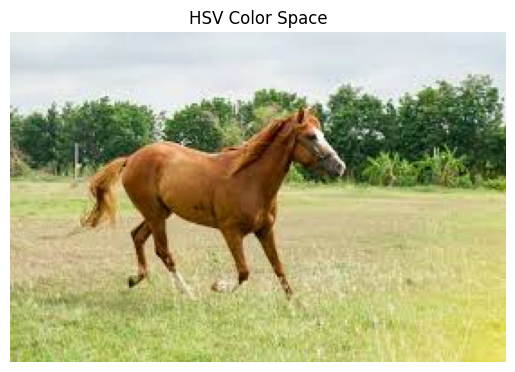

In [8]:
img = cv2.imread('data/horse2.jpeg')
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
plt.imshow(cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB))
plt.title("HSV Color Space")
plt.axis("off")
plt.show()


3. Thresholding and Masking

Basic form of segmentation.

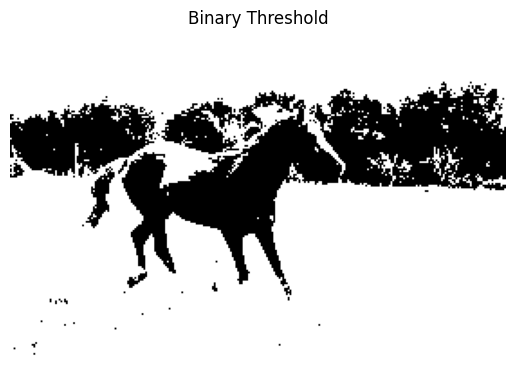

In [9]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

plt.imshow(thresh, cmap='gray')
plt.title("Binary Threshold")
plt.axis("off")
plt.show()


4. Contour Detection

Can be used for object shape analysis, ROI extraction.

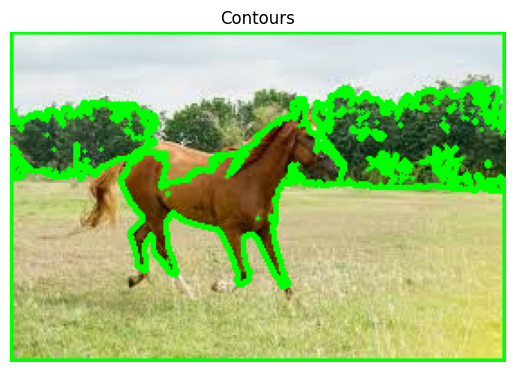

In [10]:
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
img_contours = img.copy()
cv2.drawContours(img_contours, contours, -1, (0,255,0), 2)

plt.imshow(cv2.cvtColor(img_contours, cv2.COLOR_BGR2RGB))
plt.title("Contours")
plt.axis("off")
plt.show()


5. Face Detection (Haar Cascades)

A very classic OpenCV application.

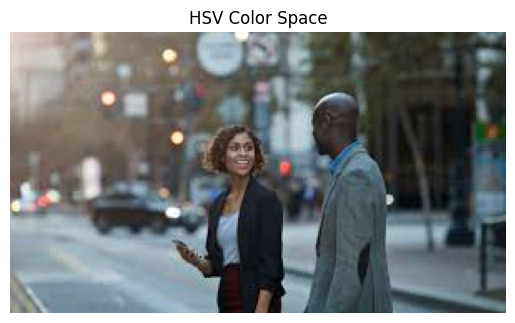

In [11]:
img = cv2.imread('data/personnes.jpeg')
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
plt.imshow(cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB))
plt.title("HSV Color Space")
plt.axis("off")
plt.show()

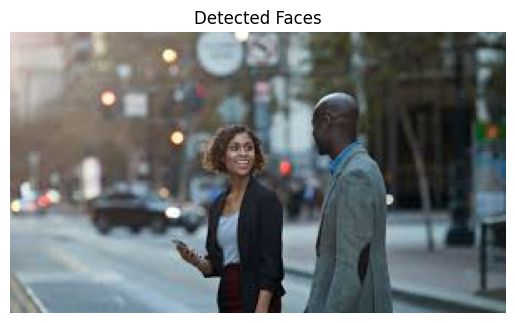

In [12]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

img_faces = img.copy()
for (x, y, w, h) in faces:
    cv2.rectangle(img_faces, (x, y), (x + w, y + h), (255, 0, 0), 2)

plt.imshow(cv2.cvtColor(img_faces, cv2.COLOR_BGR2RGB))
plt.title("Detected Faces")
plt.axis("off")
plt.show()


6. Morphological Operations

Often used in preprocessing for segmentation.

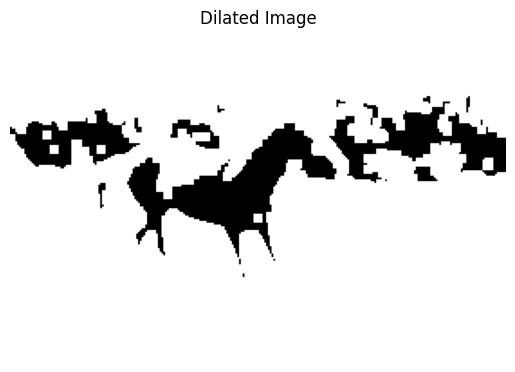

In [13]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
dilated = cv2.dilate(thresh, kernel, iterations=1)

plt.imshow(dilated, cmap='gray')
plt.title("Dilated Image")
plt.axis("off")
plt.show()


# Computer Vision with Deep Learning: Classification, Detection, and Segmentation

## Section : Image Augmentation

###  Common Image Augmentation Methods

Image augmentation techniques are used to artificially increase the diversity of the training set by applying transformations to existing images. These methods help models generalize better by simulating variations in lighting, orientation, scale, and more.

#### 🔄 Common Techniques
- **Flipping** (horizontal/vertical)
- **Rotation** (random degrees)
- **Cropping** (random crops, center crops)
- **Scaling and Zooming**
- **Color Jitter** (brightness, contrast, saturation)
- **Blurring or Sharpening**
- **Adding Noise**

### 14.1.2 Training with Image Augmentation

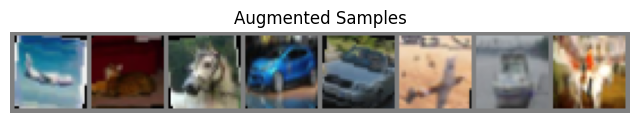

In [14]:
import numpy as np
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

transform_train = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    transforms.RandomResizedCrop(32, scale=(0.8, 1.0)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

train_dataset = datasets.CIFAR10(root="./data", train=True, download=True, transform=transform_train)
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)

# Visualize samples
import matplotlib.pyplot as plt
import torchvision

data_iter = iter(train_loader)
images, labels = next(data_iter)

def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.figure(figsize=(8, 4))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.title("Augmented Samples")
    plt.axis("off")
    plt.show()

imshow(torchvision.utils.make_grid(images))

### Summary
- Augmentation helps avoid overfitting.
- Simple transformations can significantly improve generalization.
- It is standard practice in image classification pipelines.

### Exercises

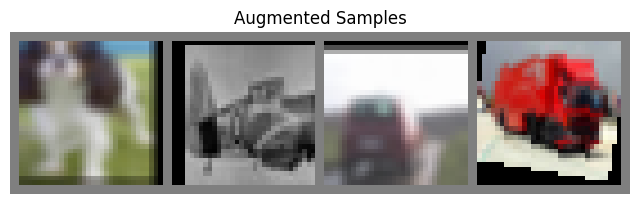

In [15]:
# EXERCISE : Try using transforms.GaussianBlur and transforms.RandomAffine

aug_experiment = transforms.Compose([
    transforms.RandomAffine(degrees=15, translate=(0.1, 0.1)),
    transforms.GaussianBlur(kernel_size=3),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

aug_dataset = datasets.CIFAR10(root="./data", train=True, download=False, transform=aug_experiment)
aug_loader = DataLoader(aug_dataset, batch_size=4, shuffle=True)

imgs, _ = next(iter(aug_loader))
imshow(torchvision.utils.make_grid(imgs))

In [16]:
from torchvision.utils import save_image
import os

os.makedirs("augmented_samples", exist_ok=True)
for i, (imgs, _) in enumerate(aug_loader):
    save_image(imgs, f"augmented_samples/batch_{i}.png")
    if i >= 2: break  # Save just a few batches


# EXERCISE : Compare model performance with/without augmentation on a subset of CIFAR-10

In [17]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Subset
import numpy as np

# Define a small CNN
class TinyCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 16, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(16, 32, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(32 * 8 * 8, 100),
            nn.ReLU(),
            nn.Linear(100, 10)
        )

    def forward(self, x):
        x = self.features(x)
        return self.classifier(x)

# Data transforms
basic_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

aug_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.RandomResizedCrop(32, scale=(0.8, 1.0)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Use only a small subset of CIFAR-10
subset_indices = list(range(1000))
basic_dataset = Subset(datasets.CIFAR10('./data', train=True, download=True, transform=basic_transform), subset_indices)
aug_dataset = Subset(datasets.CIFAR10('./data', train=True, download=False, transform=aug_transform), subset_indices)


basic_loader = DataLoader(basic_dataset, batch_size=32, shuffle=True)
aug_loader = DataLoader(aug_dataset, batch_size=32, shuffle=True)

def train_model(dataloader, epochs=3):
    model = TinyCNN()
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    criterion = nn.CrossEntropyLoss()
    model.train()
    for epoch in range(epochs):
        running_loss = 0
        correct = 0
        total = 0
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        acc = 100 * correct / total
        print(f"Epoch {epoch+1}: Loss={running_loss:.3f}, Accuracy={acc:.2f}%")
    return model

print("Training WITHOUT augmentation:")
train_model(basic_loader)

print("Training WITH augmentation:")
train_model(aug_loader)

Training WITHOUT augmentation:
Epoch 1: Loss=70.491, Accuracy=18.90%
Epoch 2: Loss=61.130, Accuracy=30.20%
Epoch 3: Loss=54.695, Accuracy=40.40%
Training WITH augmentation:
Epoch 1: Loss=70.146, Accuracy=17.70%
Epoch 2: Loss=62.645, Accuracy=28.80%
Epoch 3: Loss=59.287, Accuracy=34.00%


TinyCNN(
  (features): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2048, out_features=100, bias=True)
    (2): ReLU()
    (3): Linear(in_features=100, out_features=10, bias=True)
  )
)

In [18]:
# Computer Vision with Deep Learning: Classification, Detection, and Segmentation

## Introduction
#In this notebook, you'll learn the fundamentals of computer vision tasks using deep learning: classification, object detection, and image segmentation. We use PyTorch and popular open datasets for demonstration.

# Required Libraries
import torch
import torchvision
import torchvision.transforms as transforms
import torchvision.models as models
import torchvision.datasets as datasets
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os
import urllib.request
import cv2



In [19]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.figure(figsize=(6, 6))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis("off")
    plt.show()


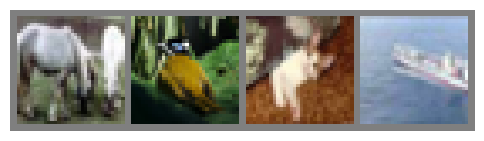

horse bird cat ship
[Epoch 1, Batch 2000] loss: 2.259
[Epoch 1, Batch 4000] loss: 1.911
[Epoch 1, Batch 6000] loss: 1.701
[Epoch 1, Batch 8000] loss: 1.624
[Epoch 1, Batch 10000] loss: 1.524
[Epoch 1, Batch 12000] loss: 1.480
[Epoch 2, Batch 2000] loss: 1.407
[Epoch 2, Batch 4000] loss: 1.368
[Epoch 2, Batch 6000] loss: 1.340
[Epoch 2, Batch 8000] loss: 1.349
[Epoch 2, Batch 10000] loss: 1.304
[Epoch 2, Batch 12000] loss: 1.300
Finished Training


In [ ]:
# SECTION 1: Image Classification
## Goal: Predict the class of the main object in an image.

# Load and preprocess CIFAR-10 dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False)

classes = trainset.classes

# Visualize some images
dataiter = iter(trainloader)
images, labels = next(dataiter)
imshow(torchvision.utils.make_grid(images))
print(' '.join(f'{classes[labels[j]]}' for j in range(4)))

# Simple CNN model for classification
class SimpleCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = SimpleCNN()

# Train the model
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

for epoch in range(2):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 2000 == 1999:
            print(f'[Epoch {epoch + 1}, Batch {i + 1}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')




/home/anne/anaconda3/envs/ml2/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/anne/anaconda3/envs/ml2/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


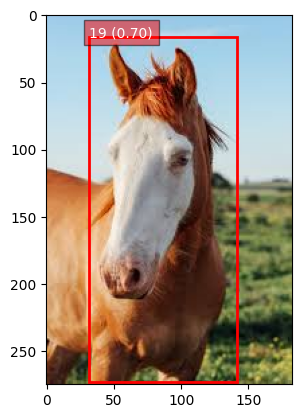

In [20]:
# SECTION 2: Object Detection with Pretrained Faster R-CNN
## Goal: Localize and classify objects in an image
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from torchvision.transforms.functional import to_tensor

# Load pretrained model
detector = fasterrcnn_resnet50_fpn(pretrained=True)
detector.eval()

# Load a test image
img_path = 'data/horse1.jpeg'  # replace with an actual image
img = Image.open(img_path).convert('RGB')
input_tensor = to_tensor(img)

# Make prediction
with torch.no_grad():
    prediction = detector([input_tensor])[0]

# Visualize detections
import matplotlib.patches as patches
fig, ax = plt.subplots(1)
ax.imshow(img)
for box, label, score in zip(prediction['boxes'], prediction['labels'], prediction['scores']):
    if score > 0.5:
        rect = patches.Rectangle((box[0], box[1]), box[2]-box[0], box[3]-box[1], linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
        ax.text(box[0], box[1], f'{label.item()} ({score:.2f})', color='white', bbox=dict(facecolor='red', alpha=0.5))
plt.show()




/home/anne/anaconda3/envs/ml2/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DeepLabV3_ResNet50_Weights.COCO_WITH_VOC_LABELS_V1`. You can also use `weights=DeepLabV3_ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


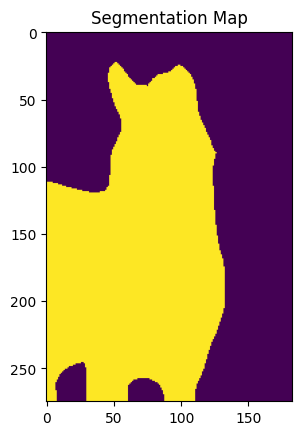

In [21]:
# SECTION 3: Image Segmentation with DeepLabV3
## Goal: Assign a class to each pixel
from torchvision.models.segmentation import deeplabv3_resnet50

segmentor = deeplabv3_resnet50(pretrained=True)
segmentor.eval()

with torch.no_grad():
    output = segmentor(input_tensor.unsqueeze(0))['out'][0]
    predicted = output.argmax(0)

plt.imshow(predicted)
plt.title('Segmentation Map')
plt.show()



In [22]:
# FINAL PROJECT: Real-time webcam image classification with a pretrained MobileNet
## Goal: Classify webcam input in real-time using a lightweight model
mobilenet = models.mobilenet_v2(pretrained=True)
mobilenet.eval()

# Load labels safely
label_url = "https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt"
label_path = "imagenet_classes.txt"

if not os.path.exists(label_path):
    urllib.request.urlretrieve(label_url, label_path)

with open(label_path) as f:
    imagenet_labels = [line.strip() for line in f.readlines()]

cap = cv2.VideoCapture(0)
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

while True:
    ret, frame = cap.read()
    if not ret:
        break
    img_pil = Image.fromarray(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    input_tensor = transform(img_pil).unsqueeze(0)
    with torch.no_grad():
        output = mobilenet(input_tensor)
    _, predicted = torch.max(output, 1)
    label = imagenet_labels[predicted.item()]
    cv2.putText(frame, label, (10, 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2)
    cv2.imshow('Webcam Classification', frame)
    if cv2.waitKey(1) == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

/home/anne/anaconda3/envs/ml2/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


KeyboardInterrupt: 

## 🧠 Final Project Idea: “Smart Sorting Assistant”  
**Goal:** Build a tool that classifies images of trash into categories: *plastic*, *paper*, *metal*, *organic*, or *other*. This mimics a smart recycling bin system.

### 🔍 Objectives  
- Apply **transfer learning** using a pretrained CNN (e.g. ResNet18 or MobileNetV2).
- Add a **custom classification head** for your five waste categories.
- Perform **image augmentation** to improve generalization.
- Include a **user upload interface** (e.g. via `ipywidgets`) or webcam integration.
- Visualize predictions with **confidence scores**.

### 🗂️ Dataset  
Use the [TrashNet dataset](https://github.com/garythung/trashnet) or create a small custom dataset with folders like:  
```
trash_dataset/
    plastic/
    paper/
    metal/
    organic/
    other/
```

### 🧰 Code Template

**1. Load Pretrained Model + Modify Head**
```python
from torchvision import models

model = models.resnet18(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, 5)  # 5 waste classes
```

**2. Prepare DataLoader**
```python
from torchvision.datasets import ImageFolder
from torchvision.transforms import Compose, ToTensor, Resize, Normalize, RandomHorizontalFlip

transform = Compose([
    Resize((224, 224)),
    RandomHorizontalFlip(),
    ToTensor(),
    Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

dataset = ImageFolder(root="trash_dataset", transform=transform)
train_loader = torch.utils.data.DataLoader(dataset, batch_size=16, shuffle=True)
```

**3. Add Webcam or Upload Prediction Cell**
```python
from IPython.display import display
import ipywidgets as widgets

uploader = widgets.FileUpload(accept='image/*', multiple=False)
display(uploader)
```

**4. Show Output**
```python
# After predicting
plt.imshow(img_tensor.permute(1, 2, 0))
plt.title(f"Prediction: {class_name} ({confidence:.1f}%)")
plt.axis("off")
plt.show()
```


git clone https://github.com/garythung/trashnet.git

Move or extract the contents to:

trash_dataset/
    cardboard/
    glass/
    metal/
    paper/
    plastic/
    trash/

(Optional) Merge or rename folders to match:
    cardboard → paper
    glass → other
    trash → other

In [23]:
import os

categories = ["plastic", "paper", "metal", "organic", "other"]
for cat in categories:
    os.makedirs(f"trash_dataset/{cat}", exist_ok=True)



### Step 1: Load and Prepare Data

In [24]:
from PIL import Image as PILImage
import os

categories = ["plastic", "paper", "metal", "organic", "other"]
for cat in categories:
    dir_path = f"trash_dataset/{cat}"
    os.makedirs(dir_path, exist_ok=True)
    img_path = os.path.join(dir_path, "sample.jpg")
    if not os.path.exists(img_path):
        PILImage.new("RGB", (224, 224), color=(255, 0, 0)).save(img_path)

from torchvision.datasets import ImageFolder
from torchvision.transforms import Compose, ToTensor, Resize, Normalize, RandomHorizontalFlip
from torch.utils.data import DataLoader

transform = Compose([
    Resize((224, 224)),
    RandomHorizontalFlip(),
    ToTensor(),
    Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

dataset = ImageFolder(root="trash_dataset", transform=transform)
train_loader = DataLoader(dataset, batch_size=16, shuffle=True)
class_names = dataset.classes


### Step 2: Modify and Train Model

In [25]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models


model = models.resnet18(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, 5)  # Five trash classes
model = model.to("cuda" if torch.cuda.is_available() else "cpu")

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop (simplified)
for epoch in range(5):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch+1} - Loss: {running_loss / len(train_loader):.4f}")

/home/anne/anaconda3/envs/ml2/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1 - Loss: 1.6702
Epoch 2 - Loss: 1.6141
Epoch 3 - Loss: 1.6240
Epoch 4 - Loss: 1.6217
Epoch 5 - Loss: 1.6184


### Step 3: Predict from Uploaded Image

# pip install ipywidgets

In [26]:
import ipywidgets as widgets
from IPython.display import display

uploader = widgets.FileUpload(accept='image/*', multiple=False)
display(uploader)

FileUpload(value=(), accept='image/*', description='Upload')

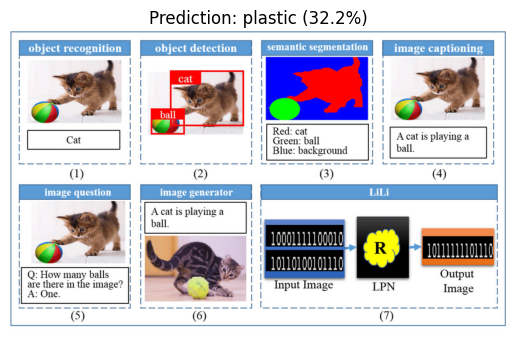

In [28]:
import io
if uploader.value:
    uploaded_file = next(iter(uploader.value.values())) if hasattr(uploader.value, 'values') else uploader.value[0]
    content = uploaded_file['content']
    img = Image.open(io.BytesIO(content)).convert("RGB")

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    img_tensor = transform(img).unsqueeze(0).to(device)

    model.eval()
    with torch.no_grad():
        output = model(img_tensor)
        _, predicted = torch.max(output, 1)
        class_name = class_names[predicted.item()]
        confidence = torch.nn.functional.softmax(output, dim=1)[0][predicted].item() * 100

    plt.imshow(img)
    plt.title(f"Prediction: {class_name} ({confidence:.1f}%)")
    plt.axis("off")
    plt.show()
else:
    print("Please upload an image to classify.")

### Project
You can deploy it with a webcam or use `gradio` or `streamlit` for a small app.
Add object detection in your web application

## 10. 📊 Model Evaluation (on test set)

In [32]:
### Load and Train Model on CIFAR-10 (if you previously did that and save the model, you can skip this cell)
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.optim as optim
import os

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=64, shuffle=True)
testloader = DataLoader(testset, batch_size=32, shuffle=False)
class_names = trainset.classes

class SimpleCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = SimpleCNN()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

model_path = "model_cifar10.pth"
if os.path.exists(model_path):
    model.load_state_dict(torch.load(model_path, map_location=device))
    print("✅ Model loaded.")
else:
    print("⏳ Training model from scratch...")
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    model.train()
    for epoch in range(5):
        running_loss = 0.0
        for inputs, labels in trainloader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f"Epoch {epoch+1} loss: {running_loss/len(trainloader):.4f}")
    torch.save(model.state_dict(), model_path)
    print("✅ Training complete and model saved.")

model.eval()

⏳ Training model from scratch...
Epoch 1 loss: 1.6423
Epoch 2 loss: 1.3492
Epoch 3 loss: 1.2150
Epoch 4 loss: 1.1220
Epoch 5 loss: 1.0453
✅ Training complete and model saved.


SimpleCNN(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


## 10. 📊 Model Evaluation (on test set)

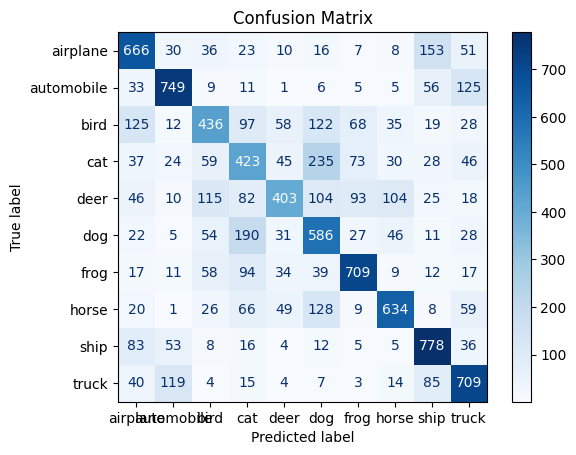

              precision    recall  f1-score   support

    airplane       0.61      0.67      0.64      1000
  automobile       0.74      0.75      0.74      1000
        bird       0.54      0.44      0.48      1000
         cat       0.42      0.42      0.42      1000
        deer       0.63      0.40      0.49      1000
         dog       0.47      0.59      0.52      1000
        frog       0.71      0.71      0.71      1000
       horse       0.71      0.63      0.67      1000
        ship       0.66      0.78      0.72      1000
       truck       0.63      0.71      0.67      1000

    accuracy                           0.61     10000
   macro avg       0.61      0.61      0.61     10000
weighted avg       0.61      0.61      0.61     10000



In [33]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

all_preds, all_labels = [], []
with torch.no_grad():
    for images, labels in testloader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

cm = confusion_matrix(all_labels, all_preds)
ConfusionMatrixDisplay(cm, display_labels=class_names).plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

print(classification_report(all_labels, all_preds, target_names=class_names))

## 11. 🔄 Test Loop with Visualization

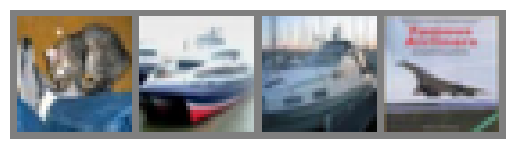

Ground Truth: ['cat', 'ship', 'ship', 'airplane']
Predicted: ['cat', 'ship', 'automobile', 'airplane']


In [34]:
import numpy as np
import torchvision

def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis("off")
    plt.show()

with torch.no_grad():
    for inputs, labels in testloader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        imshow(torchvision.utils.make_grid(inputs.cpu()[:4]))
        print("Ground Truth:", [class_names[labels[j]] for j in range(4)])
        print("Predicted:", [class_names[preds[j]] for j in range(4)])
        break

## 12. 📈 Filter and Activation Visualization

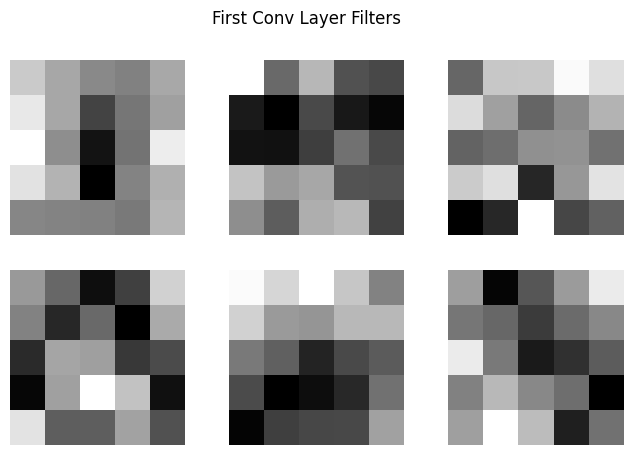

In [35]:
first_layer = model.conv1
filters = first_layer.weight.data.clone().cpu()
fig, axs = plt.subplots(2, 3, figsize=(8, 5))
for i, ax in enumerate(axs.flat):
    ax.imshow(filters[i][0], cmap='gray')
    ax.axis('off')
plt.suptitle("First Conv Layer Filters")
plt.show()

## 13. 🧪 Classical Segmentation with OpenCV (K-means)

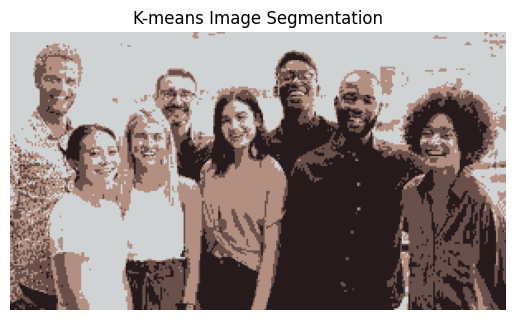

In [38]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("data/groupe.jpeg")
Z = img.reshape((-1, 3))
Z = np.float32(Z)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
k = 4
_, labels, centers = cv2.kmeans(Z, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
centers = np.uint8(centers)
res = centers[labels.flatten()].reshape((img.shape))
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("K-means Image Segmentation")
plt.show()

## 14. 📦 Bonus Project: YOLOv8 with Webcam (if available)

In [ ]:
# pip install ultralytics
from ultralytics import YOLO
model_yolo = YOLO("yolov8n.pt")

# Use webcam if available, otherwise use a local image as fallback
try:
    model_yolo.predict(source=0, show=True)  # Webcam input
except Exception as e:
    print("⚠️ Webcam not available. Running on a sample image instead.")
    model_yolo.predict(source="horse1.jpeg", show=True)


1/1: 0... Success ✅ (inf frames of shape 640x480 at 30.00 FPS)


WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

0: 480x640 1 person, 100.7ms
0: 480x640 1 person, 140.9ms
0: 480x640 1 person, 84.6ms
0: 480x640 1 person, 64.5ms
0: 480x640 1 person, 72.2ms
0: 480x640 2 persons, 73.2ms
0: 480x640 1 person, 166.7ms
0: 480x640 1 person, 125.7ms
0: 480x640 1 person, 72.2ms
0: 480x640 1 person, 62.1ms
0: 480x640 1 person, 78.5ms
0: 480x640 1 person, 80.2ms
0: 480x640 2 persons, 93.6ms
0: 480x640 1 person, 9

KeyboardInterrupt: 

: 


## 15. 📖 Final Glossary & Visual Summary
```markdown
| Task                   | Input   | Output                  | Model Type         | Dataset         |
|------------------------|---------|--------------------------|--------------------|-----------------|
| Image Classification   | Image  | Class label             | CNN                | CIFAR-10        |
| Object Detection       | Image  | Boxes + Labels          | Faster R-CNN, YOLO | COCO, PascalVOC |
| Semantic Segmentation  | Image  | Pixel-wise class map    | FCN, DeepLab       | Cityscapes, VOC |
| Instance Segmentation  | Image  | Object masks            | Mask R-CNN         | COCO            |